自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

In [1]:
# pip install opencv-python

In [2]:
# pip install google_images_download

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。



In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# import os
# os.chdir('/content/drive/My Drive')
# print(os.getcwd())

In [5]:
# !git clone https://github.com/Joeclinton1/google-images-download.git

In [6]:
# import os
# os.chdir('/content/drive/My Drive/google-images-download/downloads')
# print(os.getcwd())

In [7]:
# !googleimagesdownload -k "犬" -l 10 -f "jpg"

In [8]:
# !googleimagesdownload -k "猫" -l 10 -f "jpg"

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

%matplotlib inline

ImageDataGenerator

In [11]:
batch_size = 2
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224
n_classes = 1

In [12]:
train_data_dir = glob.glob('/content/drive/My Drive/Sprint18/train' + '/*' + ".jpg")
train_data_dog = glob.glob('/content/drive/My Drive/Sprint18/train/dog' + '/*' + ".jpg")
train_data_cat = glob.glob('/content/drive/My Drive/Sprint18/train/cat' + '/*' + ".jpg")

In [13]:
train_data_dog

['/content/drive/My Drive/Sprint18/train/dog/dog1.jpg',
 '/content/drive/My Drive/Sprint18/train/dog/dog2.jpg',
 '/content/drive/My Drive/Sprint18/train/dog/dog3.jpg',
 '/content/drive/My Drive/Sprint18/train/dog/dog4.jpg',
 '/content/drive/My Drive/Sprint18/train/dog/dog5.jpg']

In [14]:
train_data_cat

['/content/drive/My Drive/Sprint18/train/cat/cat1.jpg',
 '/content/drive/My Drive/Sprint18/train/cat/cat2.jpg',
 '/content/drive/My Drive/Sprint18/train/cat/cat3.jpg',
 '/content/drive/My Drive/Sprint18/train/cat/cat4.jpg',
 '/content/drive/My Drive/Sprint18/train/cat/cat5.jpg']

In [15]:
PATH = os.path.join('/content/drive/My Drive/Sprint18')

In [16]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')

train_cats_dir = os.path.join(train_dir, 'cat')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dog')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cat')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dog')  # 検証用の猫画像のディレクトリ

In [17]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [18]:
#　学習画像、検証画像
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

In [19]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=1,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 10 images belonging to 2 classes.


In [20]:

val_data_gen = validation_image_generator.flow_from_directory(batch_size=1,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 7 images belonging to 2 classes.


In [21]:
sample_training_images, _ = next(train_data_gen)

In [22]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [23]:
K.clear_session()
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [24]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
5/5 [==============================] - 3s 635ms/step - loss: 4.0034 - accuracy: 0.8000 - val_loss: 5.3360 - val_accuracy: 0.0000e+00
Epoch 2/15
5/5 [==============================] - 2s 339ms/step - loss: 1.5462 - accuracy: 0.4000 - val_loss: 0.6614 - val_accuracy: 0.6667
Epoch 3/15
5/5 [==============================] - 1s 172ms/step - loss: 0.6903 - accuracy: 0.6000 - val_loss: 0.7152 - val_accuracy: 0.3333
Epoch 4/15
5/5 [==============================] - 0s 19ms/step - loss: 0.7199 - accuracy: 0.4000 - val_loss: 0.6783 - val_accuracy: 0.6667
Epoch 5/15
5/5 [==============================] - 0s 22ms/step - loss: 0.7169 - accuracy: 0.0000e+00 - val_loss: 0.6821 - val_accuracy: 0.6667
Epoch 6/15
5/5 [==============================] - 0s 21ms/step - loss: 0.6983 - accuracy: 0.4000 - val_loss: 0.6951 - val_accuracy: 0.3333
Epoch 7/15
5/5 [==============================] - 0s 17ms/step - loss: 0.6120 - accuracy: 1.0000 - val_loss: 0.7001 - val_accuracy: 0.3333
Epoch 8/15
5/5 [

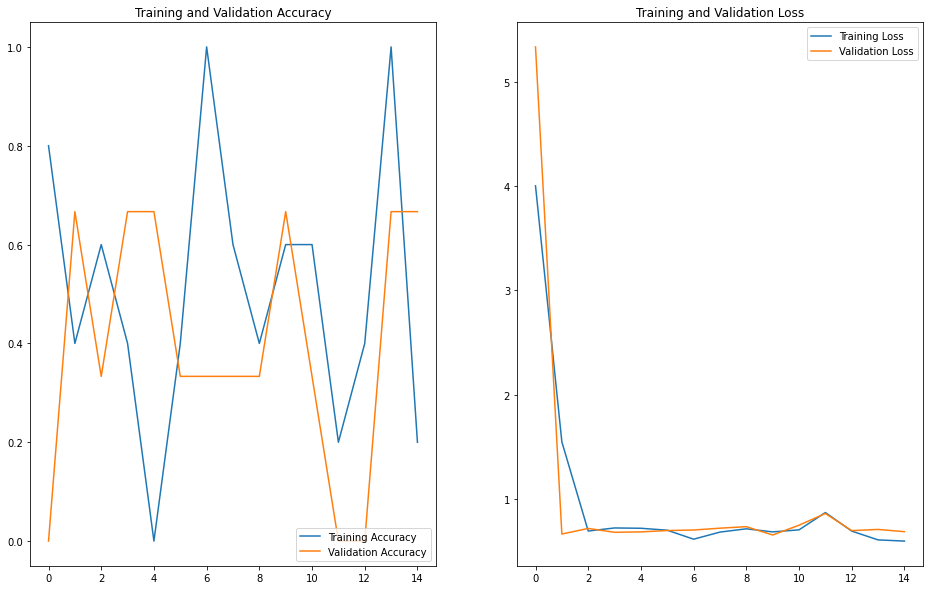

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Sprint17_make_dataset（受講生用)の場合

In [73]:
%cd '/content/drive/My Drive/Sprint18/animal'

/content/drive/My Drive/Sprint18/animal


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# イメージのディレクトリ
img_path ='/content/drive/My Drive/Sprint18/animal'
img_files = os.listdir(img_path)
print(img_files)

['cat1.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'cat5.jpg', 'dog1.jpg', 'dog2.jpg', 'dog3.jpg', 'dog4.jpg', 'dog5.jpg']


In [76]:
img_list = glob.glob(img_path + '/*' + ".jpg")
img_list

['/content/drive/My Drive/Sprint18/animal/cat1.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat2.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat3.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat4.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat5.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog1.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog2.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog3.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog4.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog5.jpg']

In [77]:
pwd

'/content/drive/My Drive/Sprint18/animal'

In [78]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)

        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))

        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)

        # 正規化
        dog_img = dog_img / 255.

        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))

        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)

        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [79]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))


dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [80]:
X = np.concatenate([dog_img_array, cat_img_array], axis = 0)
X.shape

(10, 224, 224, 3)

In [81]:
y = ["dog", "dog", "dog", "dog", "dog", "cat", "cat", "cat", "cat", "cat"] # dog:1 cat:0

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#ラベルエンコーディング
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

[1 1 1 1 1 0 0 0 0 0]


In [84]:
K.clear_session()
# ハイパーパラメータの設定

batch_size = 1
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224
n_classes = 1

# model構築
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [85]:

# モデルの学習
model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=batch_size )

Epoch 1/15
6/6 [==============================] - 0s 4ms/step - loss: 1.8453 - accuracy: 0.5000
Epoch 2/15
6/6 [==============================] - 0s 4ms/step - loss: 0.8358 - accuracy: 0.5000
Epoch 3/15
6/6 [==============================] - 0s 4ms/step - loss: 0.6333 - accuracy: 0.6667
Epoch 4/15
6/6 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 1.0000
Epoch 5/15
6/6 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 1.0000
Epoch 6/15
6/6 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 0s 4ms/step - loss: 8.1419e-04 - accuracy: 1.0000
Epoch 8/15
6/6 [==============================] - 0s 4ms/step - loss: 1.5918e-04 - accuracy: 1.0000
Epoch 9/15
6/6 [==============================] - 0s 4ms/step - loss: 9.7556e-05 - accuracy: 1.0000
Epoch 10/15
6/6 [==============================] - 0s 4ms/step - loss: 1.6361e-06 - accuracy: 1.0000
Epoch 11/15
6/6 [======

In [86]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 9.93166446685791
Test accuracy: 0.5


## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albumentations-team/albumentations)


また、Kerasを使う場合はImageDataGeneratorも便利です。




《データ拡張の効果の調査》


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

ImageDataGenerator

水平反転

In [60]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [61]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 10 images belonging to 2 classes.


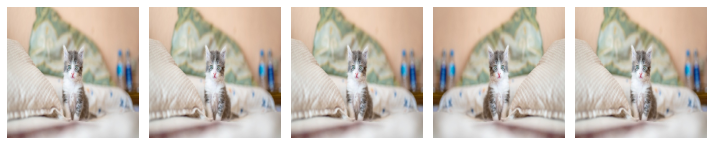

In [62]:
# 上で学習用画像の可視化のために定義、使用されたおなじカスタムプロット関数を再利用する
plotImages(augmented_images)

回転

In [63]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [64]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 10 images belonging to 2 classes.


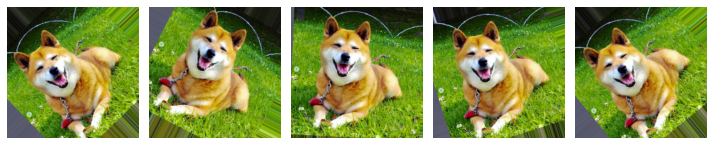

In [65]:
plotImages(augmented_images)

In [66]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [67]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 10 images belonging to 2 classes.


In [ ]:
plotImages(augmented_images)

In [68]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255, #  画素値のリスケーリング係数
                    rotation_range=45, # 画像をランダムに回転する回転範囲
                    width_shift_range=.15, # ランダムに水平シフトする範囲
                    height_shift_range=.15, # ランダムに垂直シフトする範囲
                    horizontal_flip=True, # 水平反転
                    zoom_range=0.5 # ランダムにズームする範囲最大50%
                    )

In [69]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 10 images belonging to 2 classes.


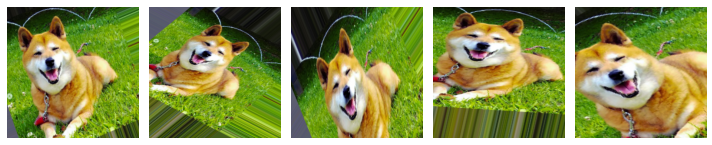

In [70]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [71]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [72]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 7 images belonging to 2 classes.


In [73]:
K.clear_session()
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

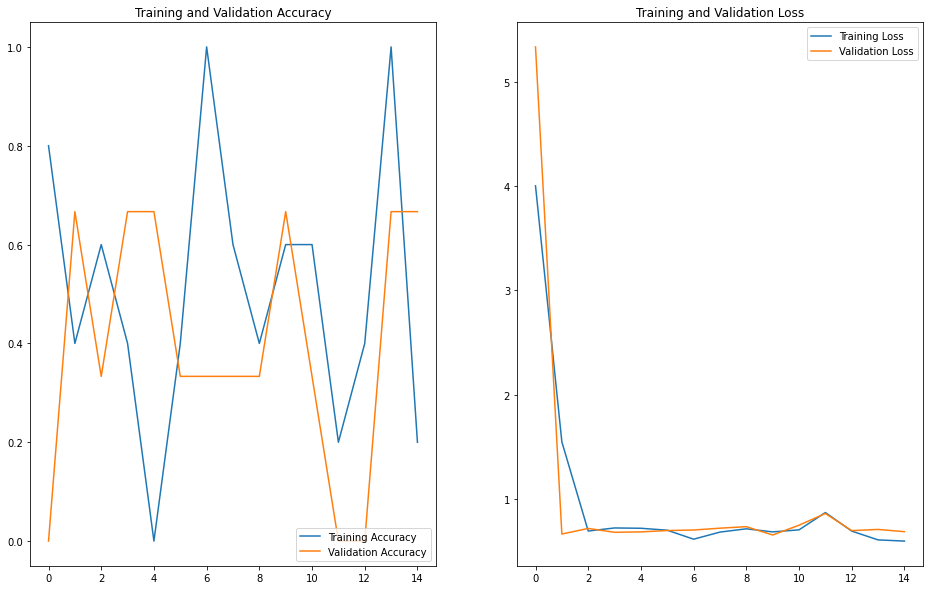

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

正解率上昇！！

## dropout実行

In [75]:
K.clear_session()
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # 20%
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # 20%
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0

In [76]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 0s 36ms/step - loss: 2.5026 - accuracy: 0.4000 - val_loss: 0.6936 - val_accuracy: 0.5714
Epoch 2/15
10/10 [==============================] - 0s 25ms/step - loss: 0.7367 - accuracy: 0.6000 - val_loss: 0.7005 - val_accuracy: 0.4286
Epoch 3/15
10/10 [==============================] - 0s 26ms/step - loss: 0.7080 - accuracy: 0.4000 - val_loss: 0.6808 - val_accuracy: 0.5714
Epoch 4/15
10/10 [==============================] - 0s 25ms/step - loss: 0.7084 - accuracy: 0.5000 - val_loss: 0.6873 - val_accuracy: 0.5714
Epoch 5/15
10/10 [==============================] - 0s 26ms/step - loss: 0.6790 - accuracy: 0.6000 - val_loss: 0.6931 - val_accuracy: 0.5714
Epoch 6/15
10/10 [==============================] - 0s 26ms/step - loss: 0.6872 - accuracy: 0.7000 - val_loss: 0.6941 - val_accuracy: 0.5714
Epoch 7/15
10/10 [==============================] - 0s 25ms/step - loss: 0.6608 - accuracy: 0.8000 - val_loss: 0.6954 - val_accuracy: 0.5714
Epoch 8/15
10

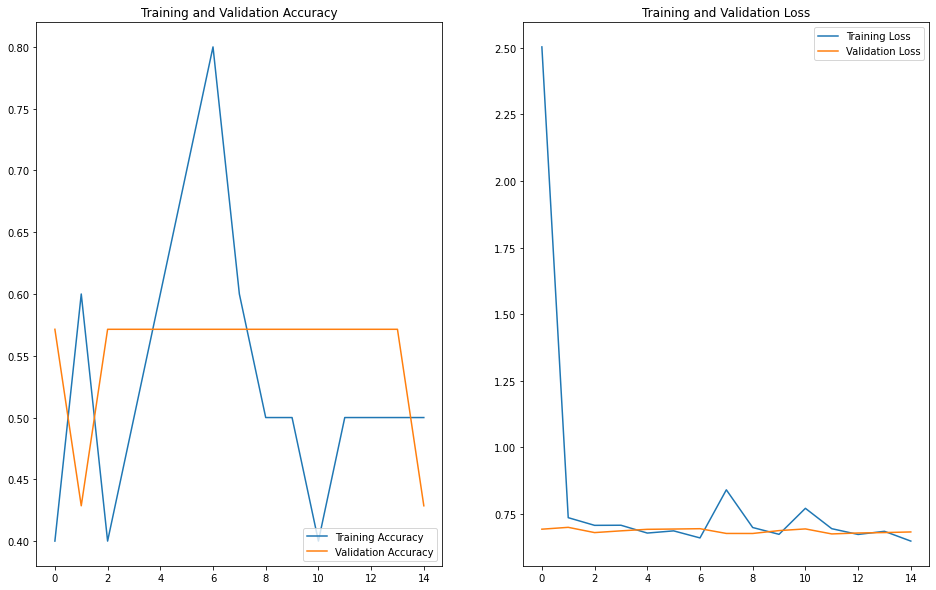

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

In [87]:
import glob

In [88]:
path = '/content/drive/My Drive/Sprint18/xml'
img_xml = glob.glob(path + '/*' + ".xml")
img_xml

['/content/drive/My Drive/Sprint18/xml/cat1.xml',
 '/content/drive/My Drive/Sprint18/xml/cat2.xml',
 '/content/drive/My Drive/Sprint18/xml/cat3.xml',
 '/content/drive/My Drive/Sprint18/xml/cat4.xml',
 '/content/drive/My Drive/Sprint18/xml/cat5.xml',
 '/content/drive/My Drive/Sprint18/xml/dog1.xml',
 '/content/drive/My Drive/Sprint18/xml/dog2.xml',
 '/content/drive/My Drive/Sprint18/xml/dog3.xml',
 '/content/drive/My Drive/Sprint18/xml/dog4.xml',
 '/content/drive/My Drive/Sprint18/xml/dog5.xml']

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

In [89]:
import albumentations
print(albumentations.__version__)

0.4.5


In [ ]:
!pip install albumentations==0.4.5


In [90]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A
import numpy as np
import xml.etree.ElementTree as ET
import re

In [39]:
!git clone https://github.com/tzutalin/labelImg


Cloning into 'labelImg'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 1682 (delta 7), reused 8 (delta 3), pack-reused 1658
Receiving objects: 100% (1682/1682), 232.70 MiB | 26.74 MiB/s, done.
Resolving deltas: 100% (997/997), done.


In [40]:

!pip install pyqt5 lxml

In [42]:

!make qt5py3

make: *** No rule to make target 'qt5py3'.  Stop.


In [43]:

!python labelImg.py

python3: can't open file 'labelImg.py': [Errno 2] No such file or directory


In [64]:
def xml_read(img_xml):

    # dtype=intにしないと見にくい
    cord_bbox = np.empty((0, 5), dtype='int')

    for i in img_xml:
        #xmlデータを読み込みます
        tree = ET.parse(i)

        #一番上の階層の要素を取り出します
        root = tree.getroot()

        data = root.find('object').find("bndbox")
        
        xmin = int(data.find("xmin").text)
        ymin = int(data.find("ymin").text)
        xmax = int(data.find("xmax").text)
        ymax = int(data.find("ymax").text)


        if re.search('dog', i.split("/")[6]):
            category_id = 0
        elif re.search('cat', i.split("/")[6]):
            category_id = 1
        
        bbox_array = np.array([xmin, ymin, xmax, ymax, category_id], dtype='int').reshape(1, 5)   
        cord_bbox = np.concatenate([cord_bbox, bbox_array], axis=0)

    return cord_bbox

In [91]:
res = xml_read(img_xml)
res

array([[ 351,   16,  891,  674,    1],
       [ 390,    1,  892,  703,    1],
       [ 497,  193,  782,  667,    1],
       [ 194,   17, 1018,  638,    1],
       [ 194,   18,  485,  322,    1],
       [ 380,   19,  668,  393,    0],
       [ 217,   43,  963,  647,    0],
       [   5,   59,  624,  988,    0],
       [  62,   60,  343,  485,    0],
       [  70,   27,  358,  393,    0]])

In [92]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)

In [25]:
pwd

'/content/drive/My Drive/Sprint18/animal'

In [93]:
file_path ='/content/drive/My Drive/Sprint18/animal'
img_list = glob.glob(file_path + '/*' + ".jpg")
img_list

['/content/drive/My Drive/Sprint18/animal/cat1.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat2.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat3.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat4.jpg',
 '/content/drive/My Drive/Sprint18/animal/cat5.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog1.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog2.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog3.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog4.jpg',
 '/content/drive/My Drive/Sprint18/animal/dog5.jpg']

In [94]:

image = cv2.imread('/content/drive/My Drive/Sprint18/animal/dog5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [109]:

bboxes = [[60,   27,  300,  374]]
category_ids = [0]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'dog', 1: 'cat'}

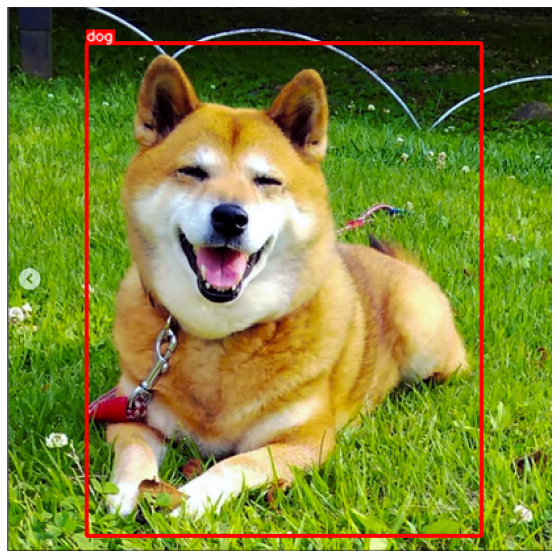

In [110]:
# Visuaize the original image with bounding boxes
visualize(image, bboxes, category_ids, category_id_to_name)

In [111]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

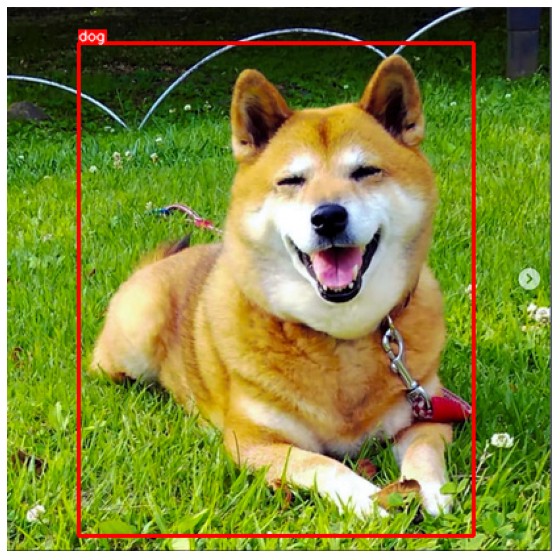

In [112]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [115]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

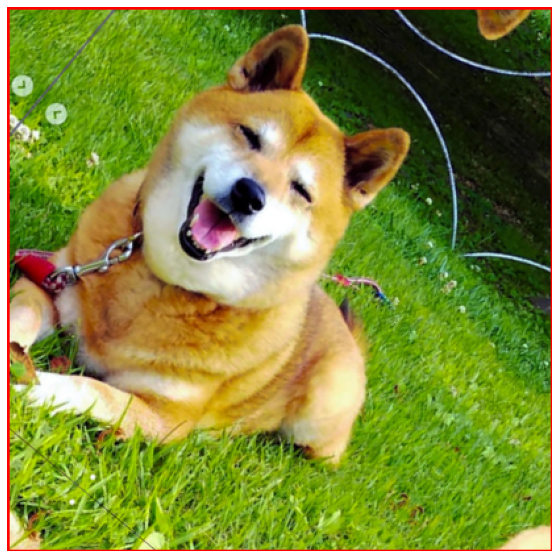

In [116]:

transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [117]:

transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

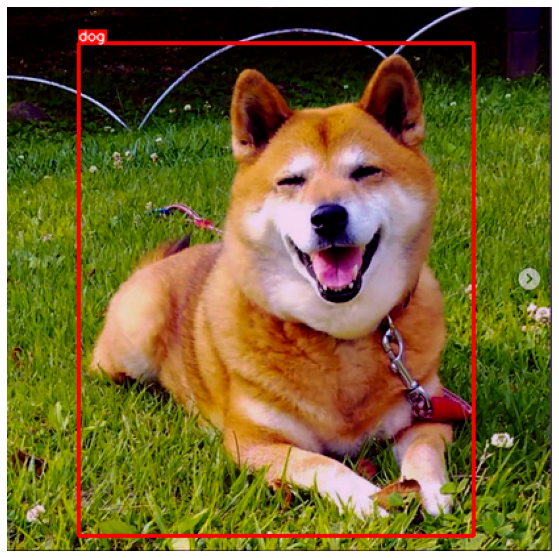

In [118]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

PCのスペックが低いので学習は・・・